In [58]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [59]:
url = "https://raw.githubusercontent.com/mariofinkb/starbucks/refs/heads/main/contacts.csv"
contacts_df = pd.read_csv(url)
print(contacts_df.shape)
contacts_df.head()

(280468, 7)


,Unnamed: 0.1,Unnamed: 0,person,event,time,type,val
0,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,1,1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2,2,e2127556f4f64592b11af22de27a7932,offer received,0,offer_id,2906b810c7d4411798c6938adc9daaa5
3,3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer_id,fafdcd668e3743c1bb461111dcafc2a4
4,4,4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0


In [60]:
url = "https://raw.githubusercontent.com/mariofinkb/starbucks/refs/heads/main/customers.csv"
customers_df = pd.read_csv(url)
print(customers_df.shape)
customers_df.head()

(17000, 7)


,Unnamed: 0.1,Unnamed: 0,gender,age,cust_id,became_member_on,income
0,0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [61]:
url = "https://raw.githubusercontent.com/mariofinkb/starbucks/refs/heads/main/offers.csv"
offers_df = pd.read_csv(url)
print(offers_df.shape)
offers_df.head()

(8, 7)


,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
4,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2


## Preprocessing
The first two columns in the contacts and customers CSV and the first column in the offers CSV can be deleted, as these are sufficient.

In [62]:
customers_df_cut = customers_df.iloc[:, 2:]
contacts_df_cut = contacts_df.iloc[:, 2:]
offers_df_cut = offers_df.iloc[:, 1:]
customers_df_cut.head()
# contacts_df_cut.head()
# offers_df_cut.head()

,gender,age,cust_id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


Analyze data.

In [63]:
# Show the earliest timestamp in the 'time' column
print(f'Min time: {contacts_df.time.min()}')

# Show the latest timestamp in the 'time' column
print(f'Max time: {contacts_df.time.max()}')

# Show all unique event types in the 'event' column
print(f'{contacts_df["event"].unique()}')

# Show how many times each event type occurs
print(f'{contacts_df["event"].value_counts()}')

# Show the minimum transaction value (only for rows where event == "transaction")
print(f'Min transaction: {contacts_df[contacts_df["event"] == "transaction"]["val"].min()}')

# Show the maximum transaction value (only for rows where event == "transaction")
print(f'Max transaction: {contacts_df[contacts_df["event"] == "transaction"]["val"].max()}')

# Show how many times each type appears in the 'type' column
print(f'{contacts_df["type"].value_counts()}')

# Show all unique values in the 'type' column
print(f'{contacts_df["type"].unique()}')

# Show the minimum age in the cleaned customer DataFrame
print(f'Min age: {customers_df_cut.age.min()}')

# Show the maximum age in the cleaned customer DataFrame
print(f'Max age: {customers_df_cut.age.max()}')

Min time: 0
Max time: 714
['offer received' 'offer viewed' 'transaction' 'offer completed']
event
transaction        138953
offer received      61042
offer viewed        46894
offer completed     33579
Name: count, dtype: int64
Min transaction: 0.05
Max transaction: 99.62
type
offer_id    141515
amount      138953
Name: count, dtype: int64
['offer_id' 'amount']
Min age: 18
Max age: 118


Some of the data in the customer database is invalid, such as ages over 90 or incomes of NaN. Delete these records.

(14820, 5)
Min age: 18
Max age: 100


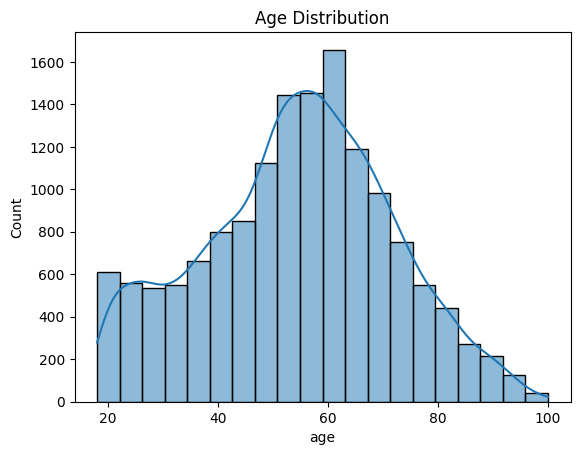

In [64]:
# Drop rows with age > 100
customers_df_cleaned = customers_df_cut[customers_df_cut["age"] <= 100]

# Drop rows where income is NaN
customers_df_cleaned = customers_df_cleaned.dropna(subset=["income"])

print(customers_df_cleaned.shape)
print(f'Min age: {customers_df_cleaned.age.min()}')
print(f'Max age: {customers_df_cleaned.age.max()}')

sns.histplot(customers_df_cleaned["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

Min date: 2013-07-29 00:00:00
Max date: 2018-07-26 00:00:00


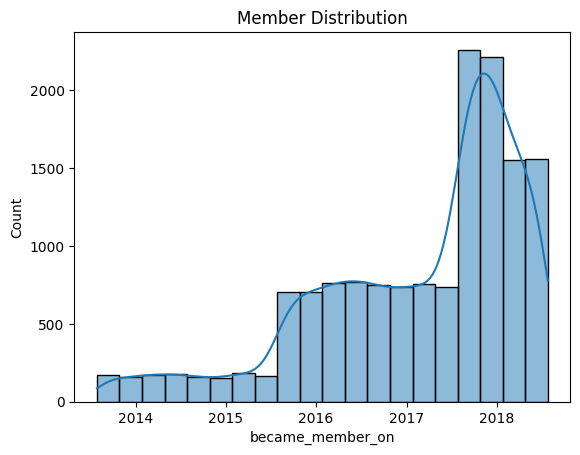

In [65]:
# Convert column to datetime
customers_df_cleaned["became_member_on"] = pd.to_datetime(customers_df_cleaned["became_member_on"], format="%Y%m%d")

# Print min and max
print("Min date:", customers_df_cleaned["became_member_on"].min())
print("Max date:", customers_df_cleaned["became_member_on"].max())

sns.histplot(customers_df_cleaned["became_member_on"], bins=20, kde=True)
plt.title("Member Distribution")
plt.show()

Min date: 30000.0
Max date: 120000.0


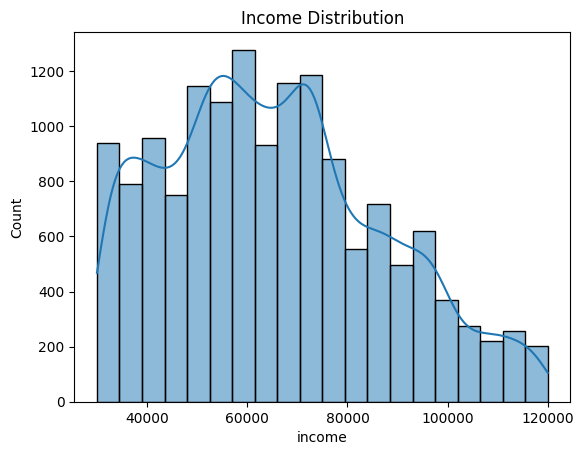

In [68]:
# Print min and max
print("Min date:", customers_df_cleaned["income"].min())
print("Max date:", customers_df_cleaned["income"].max())

sns.histplot(customers_df_cleaned["income"], bins=20, kde=True)
plt.title("Income Distribution")
plt.show()

In [67]:
# Count how many 'cust_id' IDs from customers_df_cleaned also appear in the 'person' column of contacts_df_cut
matches = customers_df_cleaned["cust_id"].isin(contacts_df_cut["person"]).sum()
print(f"{matches} matches found.")

14817 matches found.


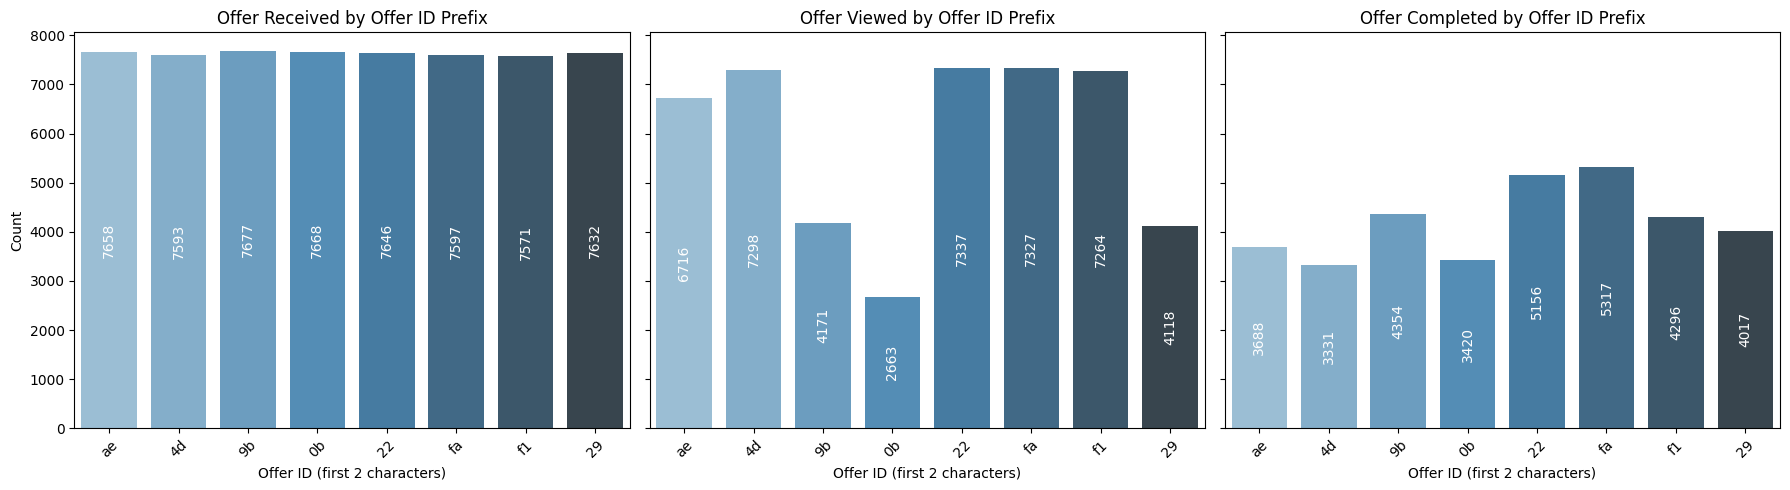

In [78]:
# List of event types to visualize
event_types = ["offer received", "offer viewed", "offer completed"]

# Offer IDs from the reference DataFrame
offer_ids = offers_df_cut["id"]

# Create subplot grid: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop through each event type and corresponding subplot axis
for i, event in enumerate(event_types):
    ax = axes[i]

    # Filter contacts for current event
    filtered_contacts = contacts_df_cut[contacts_df_cut["event"] == event]

    # Count matches of each offer ID
    match_counts = offer_ids.apply(lambda offer_id: (filtered_contacts["val"] == offer_id).sum())

    # Prepare DataFrame for plotting
    stats_df = pd.DataFrame({
        "offer_id": offer_ids,
        "match_count": match_counts
    })
    stats_df["offer_prefix"] = stats_df["offer_id"].str[:2]

    # Plot the bar chart
    sns.barplot(
        x="offer_prefix",
        y="match_count",
        data=stats_df,
        hue="offer_prefix",
        palette="Blues_d",
        legend=False,
        ax=ax
    )

    # Add value labels inside the bars
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[str(int(v.get_height())) if v.get_height() > 0 else '' for v in container],
            label_type='center',
            rotation=90,
            color='white',
            fontsize=10
        )

    # Style the subplot
    ax.set_title(f"{event.title()} by Offer ID Prefix")
    ax.set_xlabel("Offer ID (first 2 characters)")
    if i == 0:
        ax.set_ylabel("Count")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Bars fit to the sum of the events.

In [79]:
# Show how many times each event type occurs
print(f'{contacts_df["event"].value_counts()}')

event
transaction        138953
offer received      61042
offer viewed        46894
offer completed     33579
Name: count, dtype: int64
